In [3]:
import numpy as np
import pandas as pd
import scipy.constants as sc
import matplotlib.pyplot as plt
from IPython.core.display_functions import clear_output
from Thorlabs_PM101R import Device
from utils import Timer

In [ ]:
device = Device()

In [ ]:
device.set_wavelength('650') # in nm

In [25]:
target_time = 60 #in s
target_step = 20 #in ms

In [ ]:
timer = Timer()

time_values = []
data_values = []
df: pd.DataFrame 

plt.figure(figsize=(10, 6))

while 1:
    if timer.get_current_time() >= target_time:
        clear_output(wait=True)
        break
    else:
     clear_output(wait=True)
     
     time_values.append(timer.get_current_time())
     data_values.append(device.get_data())
     df = pd.DataFrame({'Time (s)': time_values, 'Power (Watts)': data_values})
     
     plt.plot(df['Time (s)'], df['Power (Watts)'])
     plt.xlabel(r'$T, Sec$', loc="right")
     plt.ylabel(r'$P, Watts$', loc="top")
     plt.grid(which='major', color='k', linestyle='-')
     plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
     plt.minorticks_on()
     plt.show()

In [ ]:
plt.plot(df['Time (s)'], df['Power (Watts)'])
plt.xlabel(r'$T, Sec$', loc="right")
plt.ylabel(r'$P, Watts$', loc="top")
plt.grid(which='major', color='k', linestyle='-')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

In [4]:
t_df = pd.read_csv('data/1.csv')

In [95]:
time_intervals = np.arange(start=min(t_df['Time (s)']), stop=max(t_df['Time (s)']),step=target_step*10**(-3))
indexes  = [np.abs(t_df['Time (s)']-time_intervals[i]).argmin() for i in range(len(time_intervals))]

In [126]:
values = []

In [129]:
[values.append(t_df['Power (Watts)'][indexes[i]:indexes[i+1]]) for i in range(len(indexes)-1)]
None

In [123]:
values = [sum(values[i]) for i in range(len(time_intervals))]

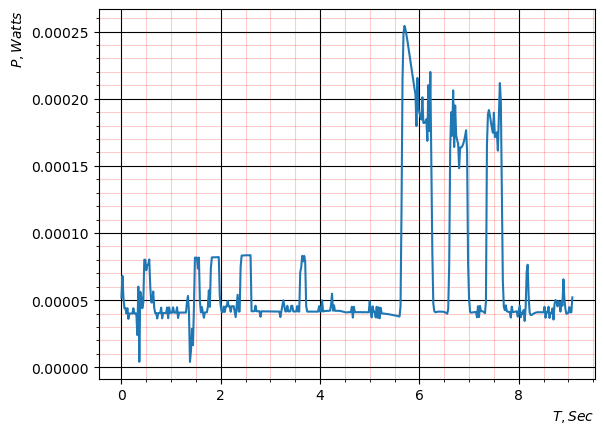

In [124]:
plt.plot(time_intervals, values)
plt.xlabel(r'$T, Sec$', loc="right")
plt.ylabel(r'$P, Watts$', loc="top")
plt.grid(which='major', color='k', linestyle='-')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

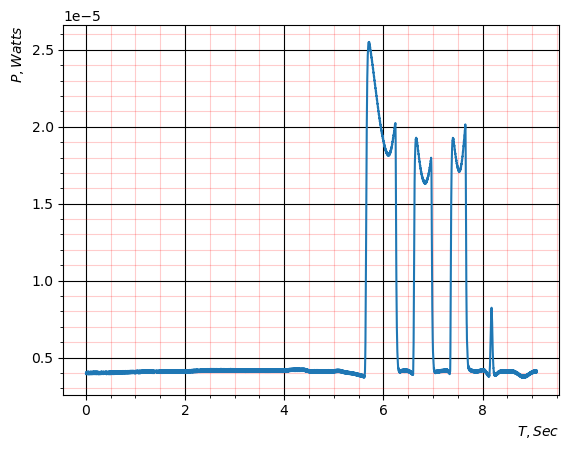

In [122]:
plt.plot(t_df['Time (s)'], t_df['Power (Watts)'])
plt.xlabel(r'$T, Sec$', loc="right")
plt.ylabel(r'$P, Watts$', loc="top")
plt.grid(which='major', color='k', linestyle='-')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()